In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apartment-rental/Dataset (1).csv


In [33]:
import pandas as pd

file_path = "/kaggle/input/apartment-rental/Dataset (1).csv"
data = pd.read_csv(file_path,index_col="ID")

# Data Observing

In [34]:
data

,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Neighborhood,Furnished,Building_Type,Rental_Price
ID,,,,,,,,
1,692,1,2,2.07,Uptown,Furnished,Apartment,5035.497680
2,622,3,1,10.85,Suburbs,Unfurnished,Condo,4316.686202
3,559,0,1,10.55,Downtown,Furnished,Studio,2211.047997
4,307,0,1,7.37,Uptown,Furnished,Studio,2330.542651
5,1097,3,2,7.41,uptown,Unfurnished,Apartment,5272.940908
...,...,...,...,...,...,...,...,...
246,482,0,1,7.19,Midtown,Furnished,Studio,1729.501548
247,807,1,1,4.48,Midtown,Furnished,Condo,3878.499944
248,1235,1,2,7.64,uptown,Furnished,Condo,3668.000968


In [35]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 250
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size_in_Sqft             252 non-null    int64  
 1   Bedrooms                 252 non-null    object 
 2   Bathrooms                252 non-null    int64  
 3   Distance_to_City_Center  252 non-null    float64
 4   Neighborhood             252 non-null    object 
 5   Furnished                252 non-null    object 
 6   Building_Type            252 non-null    object 
 7   Rental_Price             252 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 71.9 KB


In [36]:
data.describe()

,Size_in_Sqft,Bathrooms,Distance_to_City_Center,Rental_Price
count,252.000000,252.000000,252.000000,252.000000
mean,798.309524,1.257937,6.552698,4073.806084
std,303.128836,0.438370,3.423793,2051.348014
min,301.000000,1.000000,0.570000,804.814268
25%,559.000000,1.000000,3.460000,2409.952761
50%,800.000000,1.000000,7.020000,3938.417295
75%,1020.500000,2.000000,9.610000,5245.943807
max,1497.000000,2.000000,11.980000,13179.276580


In [30]:
data.isnull().value_counts()

Size_in_Sqft  Bedrooms  Bathrooms  Distance_to_City_Center  Neighborhood  Furnished  Building_Type  Rental_Price
False         False     False      False                    False         False      False          False           250
Name: count, dtype: int64

# Data Preprocessing

In [37]:
data.loc[data.duplicated()]

,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Neighborhood,Furnished,Building_Type,Rental_Price
ID,,,,,,,,
67,301,0,1,11.36,Downtown,Furnished,Studio,1569.109771
187,631,1,1,1.43,Uptown,Unfurnished,Apartment,5191.320454


In [38]:
data = data.drop_duplicates()

In [39]:
data.loc[data.duplicated()]

,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Neighborhood,Furnished,Building_Type,Rental_Price
ID,,,,,,,,


In [40]:
data.Neighborhood.unique()

array(['Uptown', 'Suburbs', 'Downtown', 'uptown', 'Midtown', 'suburbs'],
      dtype=object)

In [42]:
from warnings import filterwarnings

data.Neighborhood = data.Neighborhood.replace("uptown","Uptown")
data.Neighborhood = data.Neighborhood.replace("suburbs", "Suburbs")


<ipython-input-42-c70adc1c4fc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Neighborhood = data.Neighborhood.replace("uptown","Uptown")
<ipython-input-42-c70adc1c4fc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Neighborhood = data.Neighborhood.replace("suburbs", "Suburbs")


In [43]:
data['Neighborhood'].value_counts()

Neighborhood
Uptown      67
Midtown     65
Suburbs     62
Downtown    56
Name: count, dtype: int64

In [44]:
data.Neighborhood.unique()

array(['Uptown', 'Suburbs', 'Downtown', 'Midtown'], dtype=object)

In [45]:
data['Furnished'].value_counts()

Furnished
Furnished      167
Unfurnished     78
unfurnished      4
furnished        1
Name: count, dtype: int64

In [46]:
data.Furnished.unique()

array(['Furnished', 'Unfurnished', 'unfurnished', 'furnished'],
      dtype=object)

In [47]:
data.Furnished = data.Furnished.replace("unfurnished","Unfurnished")
data.Furnished = data.Furnished.replace("furnished", "Furnished")

<ipython-input-47-a436240c6712>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Furnished = data.Furnished.replace("unfurnished","Unfurnished")
<ipython-input-47-a436240c6712>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Furnished = data.Furnished.replace("furnished", "Furnished")


In [48]:
data.Furnished.unique()

array(['Furnished', 'Unfurnished'], dtype=object)

In [49]:
data.Building_Type.unique()

array(['Apartment', 'Condo', 'Studio', 'apartment', 'condo'], dtype=object)

In [50]:
data['Building_Type'].value_counts()

Building_Type
Condo        88
Apartment    82
Studio       76
apartment     2
condo         2
Name: count, dtype: int64

In [51]:
data.Building_Type = data.Building_Type.replace("apartment","Apartment")
data.Building_Type = data.Building_Type.replace("condo","Condo")

<ipython-input-51-0e30b8420783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Building_Type = data.Building_Type.replace("apartment","Apartment")
<ipython-input-51-0e30b8420783>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Building_Type = data.Building_Type.replace("condo","Condo")


In [52]:
data.Building_Type.unique()

array(['Apartment', 'Condo', 'Studio'], dtype=object)

In [53]:
data.Bedrooms.unique()

array(['1', '3', '0', '2', '4', 'O'], dtype=object)

In [54]:
data.Bedrooms = data.Bedrooms.replace("O","-1")


<ipython-input-54-5dd4205235f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Bedrooms = data.Bedrooms.replace("O","-1")


In [55]:
data.Bedrooms = data.Bedrooms.astype(int)

<ipython-input-55-578610cb4c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Bedrooms = data.Bedrooms.astype(int)


In [24]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1 to 250
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size_in_Sqft             250 non-null    int64  
 1   Bedrooms                 250 non-null    int64  
 2   Bathrooms                250 non-null    int64  
 3   Distance_to_City_Center  250 non-null    float64
 4   Neighborhood             250 non-null    object 
 5   Furnished                250 non-null    object 
 6   Building_Type            250 non-null    object 
 7   Rental_Price             250 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 59.1 KB


In [58]:
new_df = data

In [59]:
new_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1 to 250
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size_in_Sqft             250 non-null    int64  
 1   Bedrooms                 250 non-null    int64  
 2   Bathrooms                250 non-null    int64  
 3   Distance_to_City_Center  250 non-null    float64
 4   Neighborhood             250 non-null    object 
 5   Furnished                250 non-null    object 
 6   Building_Type            250 non-null    object 
 7   Rental_Price             250 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 59.1 KB


In [60]:
new_df.columns

Index(['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Distance_to_City_Center',
       'Neighborhood', 'Furnished', 'Building_Type', 'Rental_Price'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

columns_to_encode = ['Neighborhood', 'Furnished', 'Building_Type']
for col in columns_to_encode:
    new_df = one_hot_encode_and_add(new_df, col)


# 'Received_tier_discount_percentage','Received_card_discount_percentage','Received_coupon_discount_percentage'

In [65]:
new_df

,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Rental_Price,Neighborhood_Downtown,Neighborhood_Midtown,Neighborhood_Suburbs,Neighborhood_Uptown,Furnished_Furnished,Furnished_Unfurnished,Building_Type_Apartment,Building_Type_Condo,Building_Type_Studio
ID,,,,,,,,,,,,,,
1,692,1,2,2.07,5035.497680,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,622,3,1,10.85,4316.686202,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,559,0,1,10.55,2211.047997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,307,0,1,7.37,2330.542651,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,1097,3,2,7.41,5272.940908,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,482,0,1,7.19,1729.501548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
247,807,1,1,4.48,3878.499944,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
248,1235,1,2,7.64,3668.000968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [66]:
new_df = new_df.drop(columns=['Furnished_Unfurnished'])

In [67]:
new_df = new_df.rename(columns = {"Furnished_Furnished":"Furnished"})

In [68]:
new_df

,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Rental_Price,Neighborhood_Downtown,Neighborhood_Midtown,Neighborhood_Suburbs,Neighborhood_Uptown,Furnished,Building_Type_Apartment,Building_Type_Condo,Building_Type_Studio
ID,,,,,,,,,,,,,
1,692,1,2,2.07,5035.497680,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,622,3,1,10.85,4316.686202,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,559,0,1,10.55,2211.047997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,307,0,1,7.37,2330.542651,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1097,3,2,7.41,5272.940908,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,482,0,1,7.19,1729.501548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
247,807,1,1,4.48,3878.499944,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
248,1235,1,2,7.64,3668.000968,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [69]:
new_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1 to 250
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size_in_Sqft             250 non-null    int64  
 1   Bedrooms                 250 non-null    int64  
 2   Bathrooms                250 non-null    int64  
 3   Distance_to_City_Center  250 non-null    float64
 4   Rental_Price             250 non-null    float64
 5   Neighborhood_Downtown    250 non-null    float64
 6   Neighborhood_Midtown     250 non-null    float64
 7   Neighborhood_Suburbs     250 non-null    float64
 8   Neighborhood_Uptown      250 non-null    float64
 9   Furnished                250 non-null    float64
 10  Building_Type_Apartment  250 non-null    float64
 11  Building_Type_Condo      250 non-null    float64
 12  Building_Type_Studio     250 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 27.3 KB


# Mutual Information

In [34]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Define Target and Features
y = new_df['Rental_Price']
X = new_df.drop(columns=['Rental_Price'])

# Compute Mutual Information Scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)

# Select Top 15 Features
selected_features = mi_scores.nlargest(15)

# Print Selected Features and Their Scores
print("Selected Features and Their Mutual Information Scores:")
print(selected_features.to_frame(name="MI Score"))  # Convert to DataFrame for better formatting


Selected Features and Their Mutual Information Scores:
                         MI Score
Bedrooms                 0.499703
Building_Type_Studio     0.411192
Size_in_Sqft             0.269920
Building_Type_Condo      0.138937
Building_Type_Apartment  0.132483
Neighborhood_Downtown    0.052551
Bathrooms                0.052086
Neighborhood_Uptown      0.021079
Neighborhood_Midtown     0.016173
Furnished                0.001800
Distance_to_City_Center  0.000000
Neighborhood_Suburbs     0.000000


# Visualisation


In [71]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

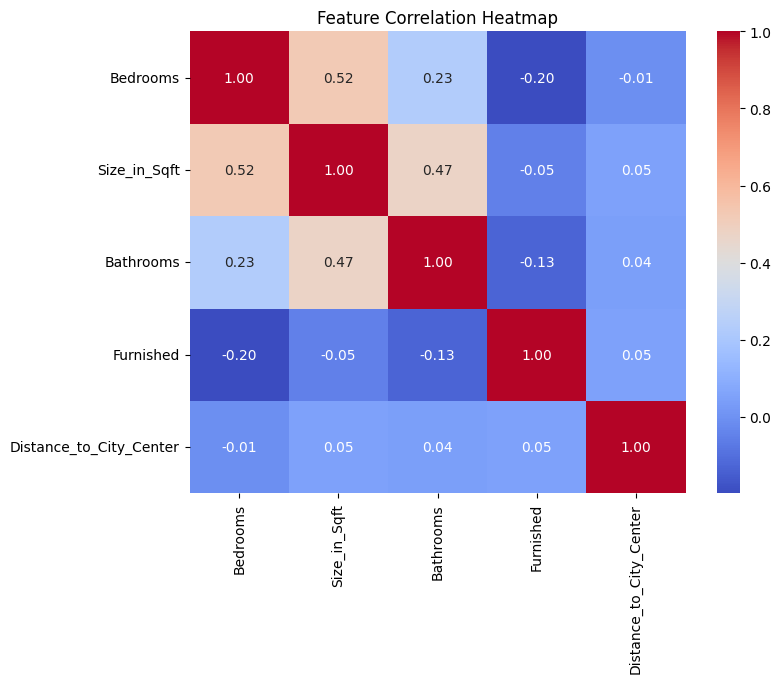

In [72]:

subset_data = new_df[['Bedrooms', 'Size_in_Sqft', 'Bathrooms', 'Furnished', 'Distance_to_City_Center']]


plt.figure(figsize=(8, 6))
sns.heatmap(subset_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Plotting Variation of each feature against Rental_Price 

In [65]:
data.columns

Index(['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Distance_to_City_Center',
       'Neighborhood', 'Furnished', 'Building_Type', 'Rental_Price'],
      dtype='object')

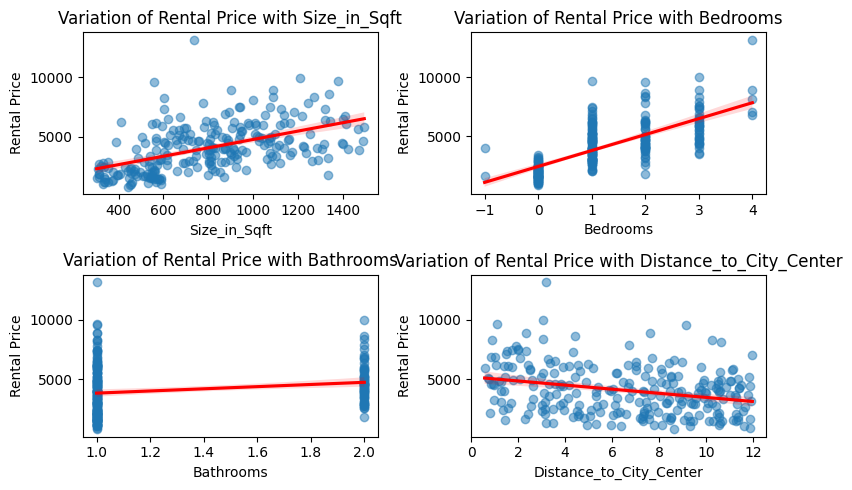

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to plot
numeric_cols = ['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Distance_to_City_Center']

# Create a 2x2 grid (you can increase the size later if you want)
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the numeric columns and plot each one
for i, each in enumerate(numeric_cols):
    sns.regplot(data=new_df, x=each, y="Rental_Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[i])

    # Set plot labels and titles
    axes[i].set_xlabel(each)
    axes[i].set_ylabel("Rental Price")
    axes[i].set_title(f"Variation of Rental Price with {each}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


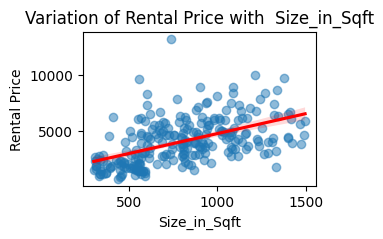

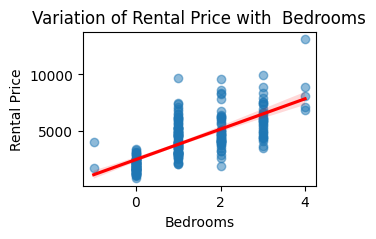

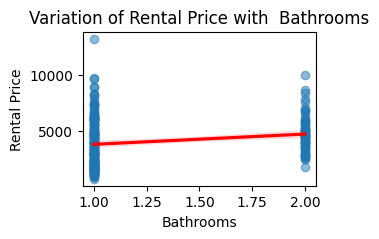

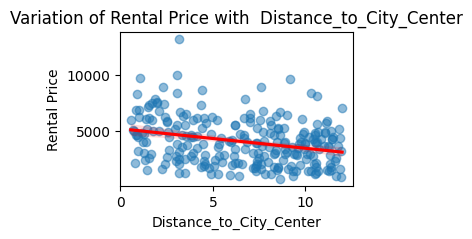

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt



numeric_cols = ['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Distance_to_City_Center']
for each in numeric_cols:
    plt.figure(figsize=(3,2))
    sns.regplot(data=new_df, x=each, y="Rental_Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})


    plt.xlabel(each)
    plt.ylabel("Rental Price")
    plt.title(f"Variation of Rental Price with  {each}")
    plt.show()
    


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set figure size
# plt.figure(figsize=(6, 3))

# # Scatter plot with trend line
# sns.regplot(data=new_df, x="Building_Type_Studio", y="Rental_Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# # Labels and title
# plt.xlabel("Building_Type_Studio")
# plt.ylabel("Rental Price")
# plt.title("Variation of Rental Price with  Building_Type_Studio")

# # Show plot
# plt.show()


In [73]:
data.Neighborhood.dtype

dtype('O')

In [75]:
data.columns

Index(['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Distance_to_City_Center',
       'Neighborhood', 'Furnished', 'Building_Type', 'Rental_Price'],
      dtype='object')

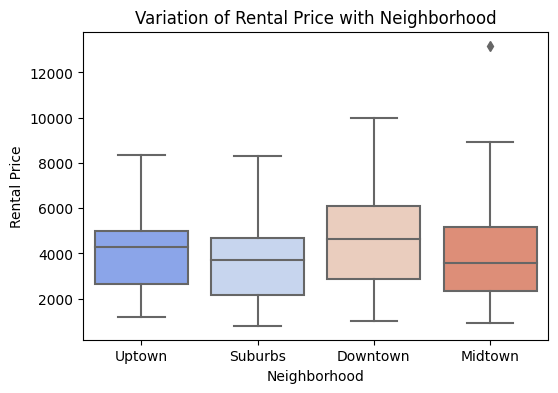

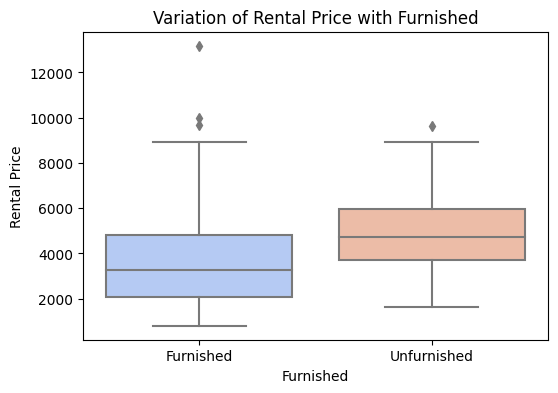

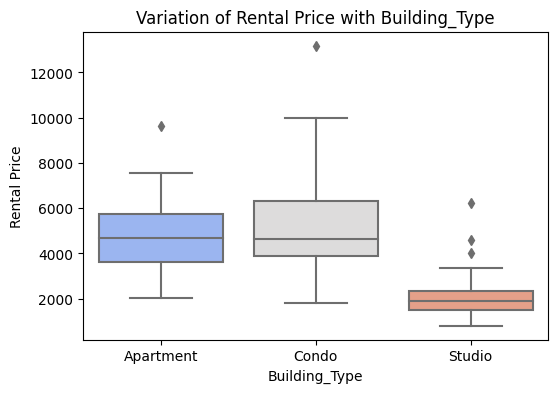

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt



categorical_cols = ['Neighborhood', 'Furnished', 'Building_Type']
for each in categorical_cols:
    plt.figure(figsize=(6, 4))

    sns.boxplot(data=data, x=each, y="Rental_Price", palette="coolwarm")

    plt.xlabel(each)
    plt.ylabel("Rental Price")
    plt.title(f"Variation of Rental Price with {each}")

    plt.show()
    


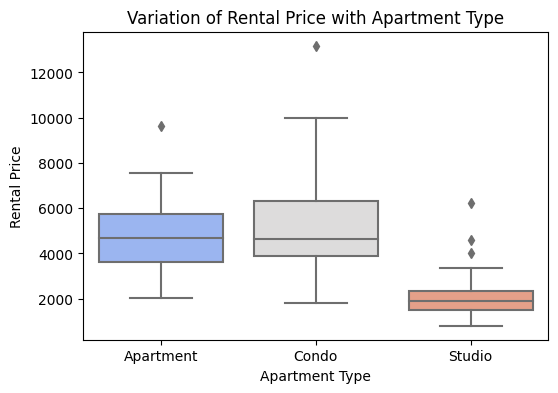

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))

# Box plot for Rental Price variation across Building Types
sns.boxplot(data=data, x="Building_Type", y="Rental_Price", palette="coolwarm")

# Labels and title
plt.xlabel("Apartment Type")
plt.ylabel("Rental Price")
plt.title("Variation of Rental Price with Apartment Type")

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))

# Box plot for Rental Price variation across Building Types
sns.boxplot(data=data, x="Bathrooms", y="Rental_Price", palette="coolwarm")

# Labels and title
plt.xlabel("Bathrooms")
plt.ylabel("Rental Price")
plt.title("Variation of Rental Price with Bathrooms")

# Show plot
plt.show()


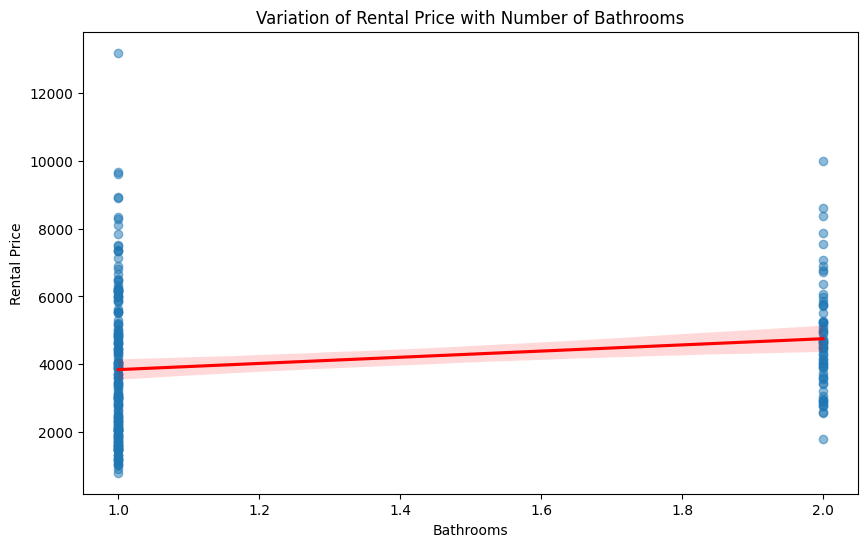

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with trend line
sns.regplot(data=new_df, x="Bathrooms", y="Rental_Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Labels and title
plt.xlabel("Bathrooms")
plt.ylabel("Rental Price")
plt.title("Variation of Rental Price with Number of Bathrooms")

# Show plot
plt.show()


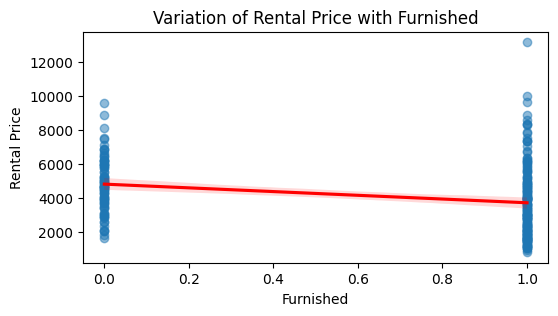

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 3))

# Scatter plot with trend line
sns.regplot(data=new_df, x="Furnished", y="Rental_Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Labels and title
plt.xlabel("Furnished")
plt.ylabel("Rental Price")
plt.title("Variation of Rental Price with Furnished")

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))

# Box plot for Rental Price variation across Building Types
sns.boxplot(data=data, x="Furnished", y="Rental_Price", palette="coolwarm")

# Labels and title
plt.xlabel("Furnished")
plt.ylabel("Rental Price")
plt.title("Variation of Rental Price with Furnished")

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6, 4))

# Box plot for Rental Price variation across Building Types
sns.boxplot(data=data, x="Neighborhood", y="Rental_Price", palette="coolwarm")

# Labels and title
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("Variation of Rental Price with Neighborhood")

# Show plot
plt.show()


# Plots by ChatGPT

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


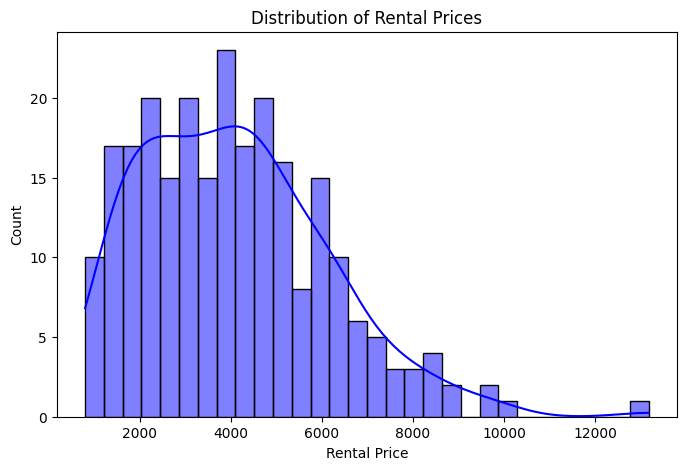

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(new_df["Rental_Price"], bins=30, kde=True, color="blue")
plt.xlabel("Rental Price")
plt.ylabel("Count")
plt.title("Distribution of Rental Prices")
plt.show()


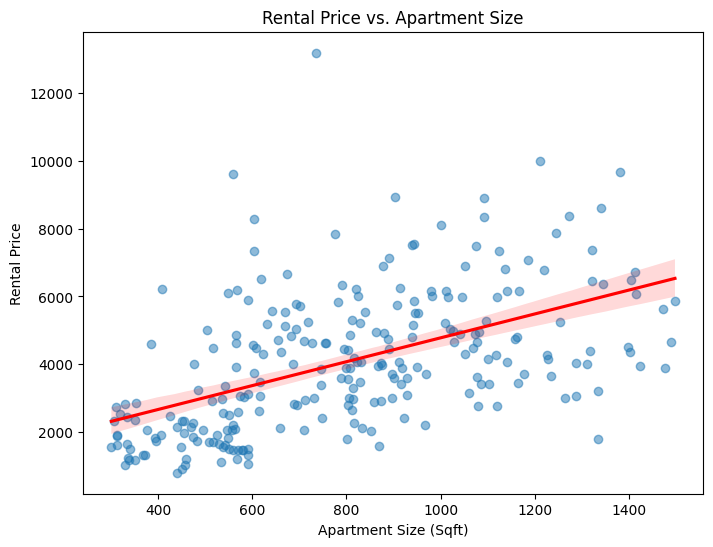

In [81]:
plt.figure(figsize=(8, 6))
sns.regplot(data=new_df, x="Size_in_Sqft", y="Rental_Price", scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Apartment Size (Sqft)")
plt.ylabel("Rental Price")
plt.title("Rental Price vs. Apartment Size")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=new_df, x="Distance_to_City_Center", y="Rental_Price", scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Distance to City Center (KM)")
plt.ylabel("Rental Price")
plt.title("Rental Price vs. Distance from City Center")
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Building_Type", y="Rental_Price", palette="coolwarm")
plt.xlabel("Building Type")
plt.ylabel("Rental Price")
plt.title("Rental Price vs. Building Type")
plt.show()


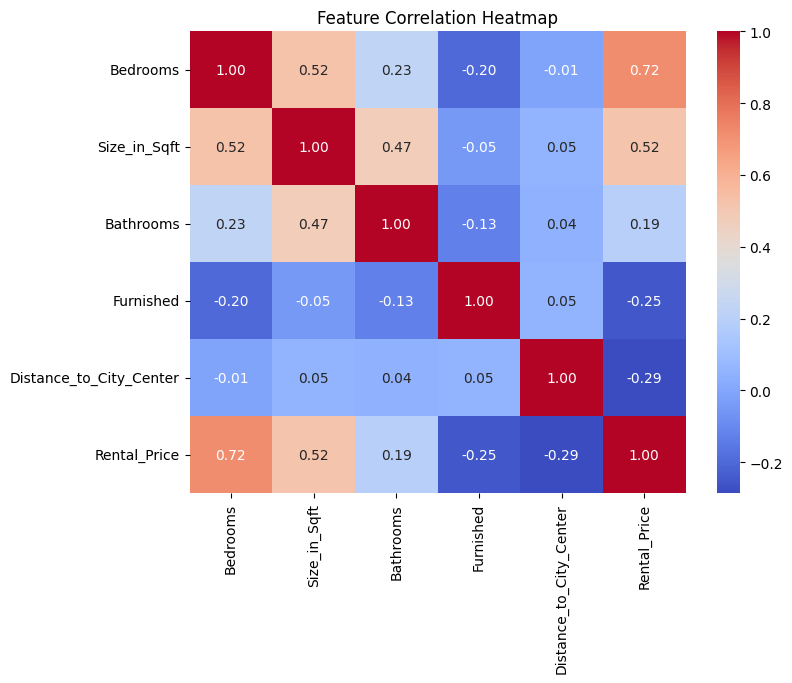

In [86]:
# Select subset of relevant columns
subset_data = new_df[['Bedrooms', 'Size_in_Sqft', 'Bathrooms', 'Furnished', 'Distance_to_City_Center','Rental_Price']]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


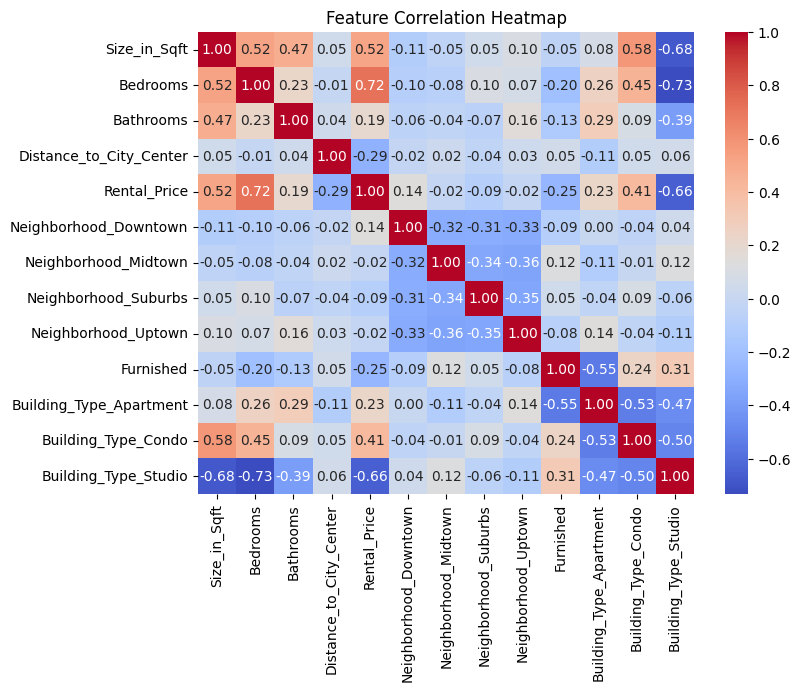

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


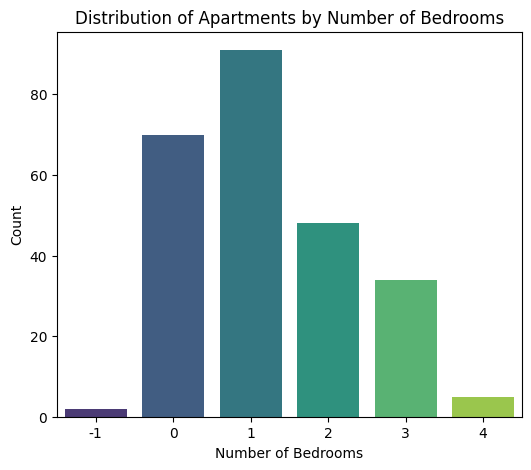

In [83]:
plt.figure(figsize=(6, 5))
sns.countplot(data=new_df, x="Bedrooms", palette="viridis")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title("Distribution of Apartments by Number of Bedrooms")
plt.show()


# Conclusion

In [15]:

filtered_data = data.loc[data['Rental_Price'] > 12000]
filtered_data


,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Neighborhood,Furnished,Building_Type,Rental_Price
ID,,,,,,,,
126,736,4,1,3.19,Midtown,Furnished,Condo,13179.27658


In [19]:
data.Bedrooms = data.Bedrooms.replace('O','-1')
data.Bedrooms = data.Bedrooms.astype(int)
rental_price_outliers = data.loc[data['Bedrooms'] > 3]
rental_price_outliers


,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Neighborhood,Furnished,Building_Type,Rental_Price
ID,,,,,,,,
98,1137,4,1,7.70,suburbs,unfurnished,Condo,6817.038486
109,1185,4,2,11.98,Midtown,Furnished,Condo,7074.471600
126,736,4,1,3.19,Midtown,Furnished,Condo,13179.276580
209,1091,4,1,7.61,Midtown,Furnished,Condo,8907.430141
212,1001,4,1,10.63,Downtown,Unfurnished,Condo,8106.271997
